In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = None

    def classify(self, input):
        return min(range(self.k), key=lambda i: np.linalg.norm(input - self.means[i]))

    def train(self, inputs):
        self.means = inputs[np.random.choice(len(inputs), self.k, replace=False)]
        assignments = None
        while True:
            new_assignments = list(map(self.classify, inputs))
            if assignments == new_assignments:
                return
            assignments = new_assignments
            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                if i_points:
                    self.means[i] = np.mean(i_points, axis=0)

Load Iris dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df = df.drop('class', axis=1)

Initialize and train K-Means

In [4]:
kmeans = KMeans(3)
kmeans.train(df.values)

Visualize results

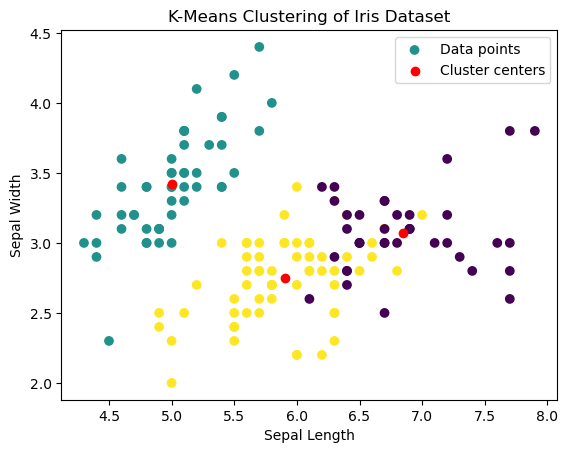

In [5]:
assignments = list(map(kmeans.classify, df.values))
plt.scatter(df['sepal-length'], df['sepal-width'], c=assignments, label='Data points')
plt.scatter([m[0] for m in kmeans.means], [m[1] for m in kmeans.means], c='red', label='Cluster centers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.show()